In [1]:
from fredapi import Fred
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
fred = Fred(api_key = '084a38e9d6fd82146cf89b8c30eba224')

var_dict = {"DGDSRC1": "Consumption Expenditure Goods", 
            "PCESC96": "Consumption Expenditure Services", 
            "EXPGSC1": "Goods & Services Exports", 
            "IMPGSC1": "Goods & Services Imports",
            "PNFIC1": "Real Private Nonresidential Fixed Investment",
            "PRFIC1": "Real Private Residential Fixed Investment",
            "GCEC1": "Real Government Consumption Expenditures and Gross Investment",
            "SLEXPND": "State and Local Government Current Expenditures"}

def get_prediction(series_key, end_date, n):
    df = fred.get_series_as_of_date(series_key, end_date).drop_duplicates(subset = ["date"], keep = "last")
    df = pd.Series(df["value"].to_list(), index = df["date"].to_list())
    df = df.dropna()
    df = df.astype("float")
    df = np.log(df)
    
    df = df.to_frame()
    df = df.rename(columns = {0: "Value"})
    df["Lagged Value"] = df["Value"].diff()
    lagged_value = df["Lagged Value"].dropna()
    
    df.plot(y = "Lagged Value")
    plt.show()
    
    print("ADF Test Result: ", adfuller(lagged_value))
    
    best_aic = float("inf")
    best_lag = None

    for lag in range(1, 11):  # Try lags from 1 to 11
        model = AutoReg(lagged_value, lags=lag).fit()
        aic = model.aic
    
        if aic < best_aic:
            best_aic = aic
            best_lag = lag
            
    print("Optimal Lag Value: ", best_lag)
            
    model = AutoReg(lagged_value, lags = best_lag).fit()
    prediction = model.predict(start = len(lagged_value), end = len(lagged_value) + n)
    return prediction

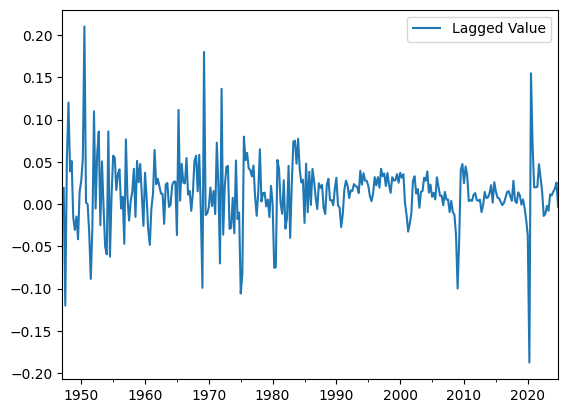

ADF Test Result:  (-5.401657219783526, 3.3601621560397635e-06, 11, 299, {'1%': -3.4524113009049935, '5%': -2.8712554127251764, '10%': -2.571946570731871}, -1112.1351850461092)
Optimal Lag Value:  4


c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Josiah Lee\

2025-01-01    0.012735
Freq: QS-OCT, dtype: float64

In [3]:
get_prediction("IMPGSC1", "2025-03-14", 0)